# Investigate Data

I want to take a look at the data, means, distribution etc.

In [1]:
import os.path
import io
import itertools

import numpy as np
from time import time

from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras
import keras.layers as layers
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.callbacks import TensorBoard
import matplotlib.pyplot as plt
import matplotlib

from astropy.io import fits
from astropy.table import Table

from decimal import Decimal
import math

from utils import *

directory = '/media/craig/CA97-4BDA/dssi_dwarfs/'
info_file = os.path.join(directory, 'stamps2.ecsv')

Using TensorFlow backend.


## User Methods

In [20]:
def get_input(filename):
    """
    Loader function for teh data given a filename
    """
    
    f = fits.open(os.path.join(directory, filename.replace('HSC', 'noiseless')))
    img = f[0].data.transpose((1, 2, 0)) # move channels to last
    return img


def get_output(dwarf_table_row, columns):    
    """
    Loader function for the y_true parameters.
    """
    
    return np.array([scale_column(column_scaling, c, dwarf_table_row[c]) for c in columns])

def preprocess_input(image):
    """
    Any preprocessing we want done... none at this point.
    """
    
#     --- Rescale Image
#     --- Rotate Image
#     --- Resize Image
#     --- Flip Image
#     --- PCA etc.
    
    return(image)


## Load the Information File

In [21]:
dwarfs_table = Table.read(info_file, format='ascii.ecsv')
dwarfs_table

<Table length=12558>
                      filename                       logmass ... noise_z noise_y
                       str52                         float64 ... float64 float64
---------------------------------------------------- ------- ... ------- -------
stamps2/d14.79_m7.45_re0.35_feh-1.2_age10.0_HSC.fits  7.4485 ...  0.0349  0.0164
stamps2/d12.46_m6.72_re0.44_feh-1.5_age12.6_HSC.fits  6.7190 ...  0.0245  0.0281
 stamps2/d9.81_m8.47_re0.84_feh-1.0_age12.3_HSC.fits  8.4725 ...  0.0251  0.0167
 stamps2/d14.38_m5.08_re0.47_feh-2.0_age7.0_HSC.fits  5.0823 ...  0.0365  0.0319
stamps2/d11.95_m8.55_re1.34_feh-1.0_age13.7_HSC.fits  8.5475 ...  0.0372  0.0224
  stamps2/d9.74_m5.33_re0.46_feh-1.8_age7.7_HSC.fits  5.3289 ...  0.0179  0.0166
stamps2/d10.94_m5.00_re0.95_feh-1.5_age13.2_HSC.fits  5.0040 ...  0.0202  0.0344
stamps2/d12.95_m5.07_re0.21_feh-2.0_age11.4_HSC.fits  5.0731 ...  0.0233  0.0198
 stamps2/d7.03_m6.23_re0.47_feh-1.8_age11.3_HSC.fits  6.2316 ...  0.0374  0.0274
stamps2/d11.57_m5.17_re0.22_feh-2.0_age11.7_HSC.fits  5.1709 ...  0.0338  0.0230
                                                 ...     ... ...     ...     ...
 stamps2/d3.73_m7.66_re0.45_feh-1.2_age13.1_HSC.fits  7.6571 ...  0.0174  0.0350
 stamps2/d10.51_m5.05_re0.19_feh-2.0_age9.7_HSC.fits  5.0504 ...  0.0291  0.0190
stamps2/d10.23_m8.55_re0.72_feh-1.2_age10.8_HSC.fits  8.5462 ...  0.0320  0.0177
stamps2/d11.71_m6.42_re0.63_feh-1.5_age10.1_HSC.fits  6.4168 ...  0.0397  0.0283
 stamps2/d3.68_m5.31_re0.53_feh-2.0_age14.0_HSC.fits  5.3101 ...  0.0324  0.0192
stamps2/d14.93_m5.67_re0.21_feh-2.0_age12.0_HSC.fits  5.6689 ...  0.0299  0.0189
 stamps2/d11.84_m7.86_re0.43_feh-1.2_age8.2_HSC.fits  7.8559 ...  0.0179  0.0350
  stamps2/d4.90_m7.64_re0.43_feh-1.0_age8.7_HSC.fits  7.6398 ...  0.0163  0.0305
stamps2/d14.13_m5.68_re0.35_feh-1.8_age10.2_HSC.fits  5.6786 ...  0.0234  0.0307
stamps2/d11.39_m8.88_re1.23_feh-1.0_age12.0_HSC.fits  8.8764 ...  0.0161  0.0344

In [22]:
row_indices = np.arange(len(dwarfs_table))

random_rows = np.random.choice(dwarfs_table, 100)

In [23]:
for row in random_rows:
    im = get_input(os.path.join(directory, row['filename']))
    print('Row {}: max, min {} {},  mean {}'.format(
        row['filename'], np.max(im), np.min(im), np.mean(im)))

Row stamps2/d10.01_m6.34_re0.16_feh-1.8_age10.5_HSC.fits: max, min 1.1879141755303664 4.899894919162655e-09,  mean 0.01340953528478939
Row stamps2/d12.62_m5.64_re0.53_feh-2.0_age13.3_HSC.fits: max, min 0.12572651698036175 3.985148747011578e-06,  mean 0.0014140975525026734
Row stamps2/d10.62_m8.19_re0.63_feh-0.8_age12.8_HSC.fits: max, min 8.57928511826313 0.00028039076307405006,  mean 0.6133072563478724
Row stamps2/d11.87_m6.60_re0.19_feh-1.5_age11.8_HSC.fits: max, min 1.3054526067496486 5.7575090878426685e-09,  mean 0.015562723592308304
Row stamps2/d12.55_m5.22_re0.29_feh-1.8_age14.3_HSC.fits: max, min 0.0707572384049285 4.03325308707492e-08,  mean 0.0005263037583475791
Row stamps2/d11.82_m5.53_re0.33_feh-1.8_age11.5_HSC.fits: max, min 0.17459586129553234 5.967152753822647e-07,  mean 0.0013955659418486476
Row stamps2/d13.12_m5.20_re0.52_feh-1.8_age12.5_HSC.fits: max, min 0.10596350382475102 1.852248653590331e-06,  mean 0.0004782715492326545
Row stamps2/d9.78_m7.36_re0.36_feh-1.5_age10.

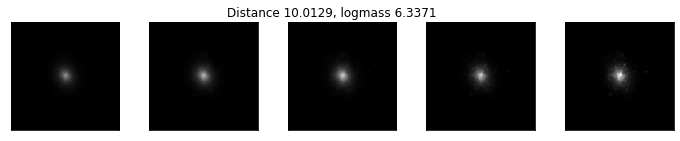

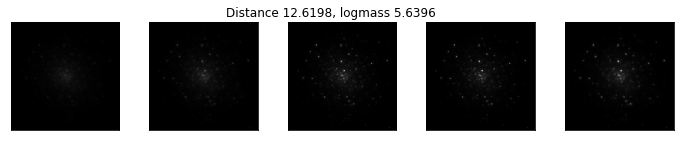

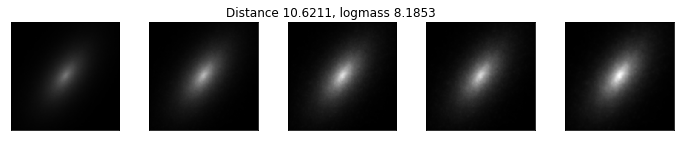

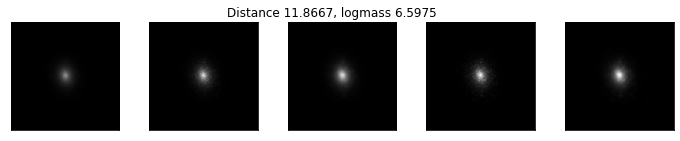

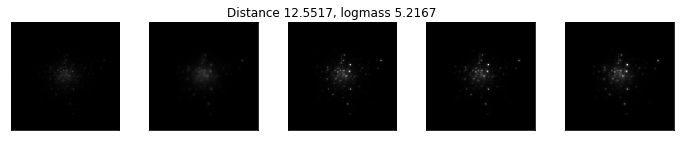

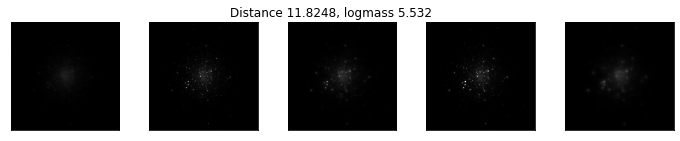

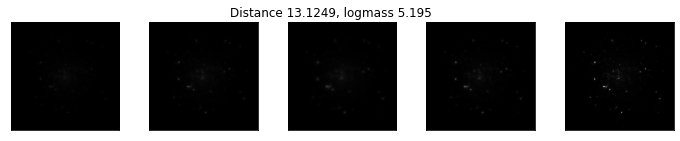

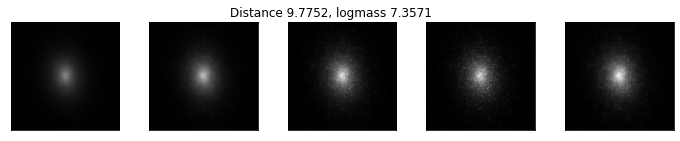

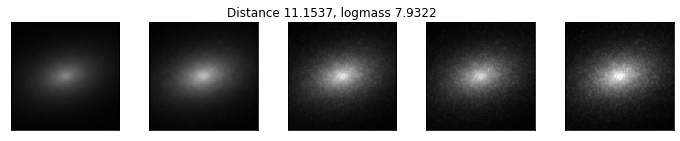

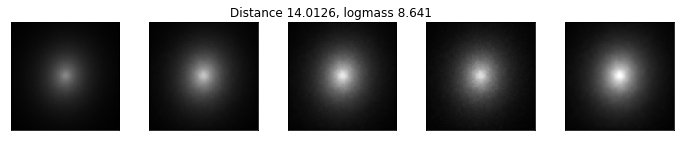

In [24]:
for rowi, row in enumerate(random_rows[:10]):
    im = get_input(os.path.join(directory, row['filename']))
    
    plt.figure(figsize=[12,2])
    for channeli in range(5):
        plt.subplot(1, 5, channeli+1)
        plt.imshow(im[:,:,channeli])
        plt.xticks([])
        plt.yticks([])
        plt.clim((np.min(im), np.max(im)))
        plt.gray()
        plt.suptitle('Distance {}, logmass {}'.format(row['distance'], row['logmass']))